<a href="https://colab.research.google.com/github/Ibeh-Faith/Breast-Cancer-IDC-ensemle-deep-learning/blob/main/Copy_of_ensembleBreast_Cancer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading all the necessary packages

In [ ]:
import os
import shutil, sys
from os import listdir
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/IDC_regular_ps50_idx5.zip'
unzip_dir = '/content/unzipped'
os.makedirs(unzip_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [ ]:
filename2 = '/content/unzipped/IDC_regular_ps50_idx5'
breastHist_imgs2 = listdir(filename2)
print("Length of the folder: ", len(breastHist_imgs2))
print("Five five files and directories: ",breastHist_imgs2[0:5])

Length of the folder:  280
Five five files and directories:  ['13591', '12242', '14153', '8867', '9125']


In [ ]:
# This would print first five of the files and directories

print(breastHist_imgs2[0:5])

['13591', '12242', '14153', '8867', '9125']


In [ ]:
total_imgs = 0 # set count to 0;
subdision = [0,1]

for i in range(len(breastHist_imgs2)):
    patient_folder = breastHist_imgs2[i]
    # Check if the item is a directory before proceeding
    if os.path.isdir(os.path.join(filename2, patient_folder)):
        for x in subdision:
            # Use os.path.join to correctly concatenate paths
            patients = os.path.join(filename2, patient_folder)
            classes_path = os.path.join(patients, str(x)) # concanating file path
            subdivision_imgs = listdir(classes_path)
            sub_tot_imgs = len(subdivision_imgs)
            print(patient_folder + "/" + str(x), "Number of images:",  + sub_tot_imgs)
            total_imgs += len(subdivision_imgs)



13591/0 Number of images: 907
13591/1 Number of images: 128
12242/0 Number of images: 668
12242/1 Number of images: 429
14153/0 Number of images: 579
14153/1 Number of images: 210
8867/0 Number of images: 1480
8867/1 Number of images: 162
9125/0 Number of images: 369
9125/1 Number of images: 239
16532/0 Number of images: 339
16532/1 Number of images: 128
16550/0 Number of images: 2115
16550/1 Number of images: 187
16569/0 Number of images: 302
16569/1 Number of images: 35
16551/0 Number of images: 1899
16551/1 Number of images: 284
15473/0 Number of images: 553
15473/1 Number of images: 885
14188/0 Number of images: 586
14188/1 Number of images: 123
9173/0 Number of images: 1020
9173/1 Number of images: 485
16895/0 Number of images: 115
16895/1 Number of images: 36
8984/0 Number of images: 962
8984/1 Number of images: 156
12870/0 Number of images: 788
12870/1 Number of images: 41
12748/0 Number of images: 168
12748/1 Number of images: 198
14190/0 Number of images: 458
14190/1 Number of

In [ ]:
print("The total number of images:", total_imgs)

The total number of images: 277524


# Started Copying from here

In [ ]:
breastcancer_ds = pd.DataFrame(index=np.arange(0, total_imgs), columns=["patient_id", "path", "target"])

n = 0 # set count to 0;
subdision = [0,1]

for i in range(len(breastHist_imgs2)):
    patient_folder = breastHist_imgs2[i]
    # Check if the item is a directory before proceeding
    # This condition now also excludes '.DS_Store'
    if os.path.isdir(os.path.join(filename2, patient_folder)) and patient_folder != '.DS_Store':
        patients = os.path.join(filename2, patient_folder) # Corrected path concatenation
        for x in subdision:
            # Use os.path.join to correctly concatenate paths
            classes_path = os.path.join(patients, str(x)) # Corrected path concatenation
            subdivision_imgs = listdir(classes_path)
            for m in range(len(subdivision_imgs)):
                image_path = subdivision_imgs[m]
                breastcancer_ds.iloc[n]["path"] = classes_path + "/" + image_path # Added missing '/' in path
                breastcancer_ds.iloc[n]["target"] = x
                breastcancer_ds.iloc[n]["patient_id"] = patient_folder
                n += 1

breastcancer_ds.tail()

<ipython-input-8-0e7e2caa0109>:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  breastcancer_ds.iloc[n]["path"] = classes_path + "/" + image_path # Added missing '/' in path
<ipython-input-8-0e7e2caa0109>:19: FutureWarning: ChainedAssignmen

,patient_id,path,target
277519,9228,/content/unzipped/IDC_regular_ps50_idx5/9228/1...,1
277520,9228,/content/unzipped/IDC_regular_ps50_idx5/9228/1...,1
277521,9228,/content/unzipped/IDC_regular_ps50_idx5/9228/1...,1
277522,9228,/content/unzipped/IDC_regular_ps50_idx5/9228/1...,1
277523,9228,/content/unzipped/IDC_regular_ps50_idx5/9228/1...,1


In [ ]:
breastcancer_ds.head()

,patient_id,path,target
0,13591,/content/unzipped/IDC_regular_ps50_idx5/13591/...,0
1,13591,/content/unzipped/IDC_regular_ps50_idx5/13591/...,0
2,13591,/content/unzipped/IDC_regular_ps50_idx5/13591/...,0
3,13591,/content/unzipped/IDC_regular_ps50_idx5/13591/...,0
4,13591,/content/unzipped/IDC_regular_ps50_idx5/13591/...,0


In [ ]:
cancer_perc = breastcancer_ds.groupby("patient_id").target.value_counts() / breastcancer_ds.groupby("patient_id").target.size()
canxer_perc = cancer_perc.unstack()



In [ ]:
canxer_perc.head()

target,0,1
patient_id,,
10253,0.872495,0.127505
10254,0.910377,0.089623
10255,0.665441,0.334559
10256,0.750000,0.250000
10257,0.672441,0.327559


In [ ]:
cancer_class_perc = breastcancer_ds.groupby(["patient_id", "target"]).target.size().groupby(level=0).apply(
    lambda x: 100*x/float(x.sum()))

# Drop the existing 'patient_id' column
cancer_class_perc = cancer_class_perc.droplevel(0)

cancer_class_perc = cancer_class_perc.reset_index(name='percentage')

cancer_class_perc.head()

,patient_id,target,percentage
0,10253,0,87.249545
1,10253,1,12.750455
2,10254,0,91.037736
3,10254,1,8.962264
4,10255,0,66.544118


In [ ]:
breastcancer_ds.groupby("target").size()

,0
target,
0,198738
1,78786


<ipython-input-14-79ee5b19d0f5>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_class_perc.iloc[:,-1:], color="red", kde=False, bins=25, ax=ax2)


Text(0, 0.5, 'count')

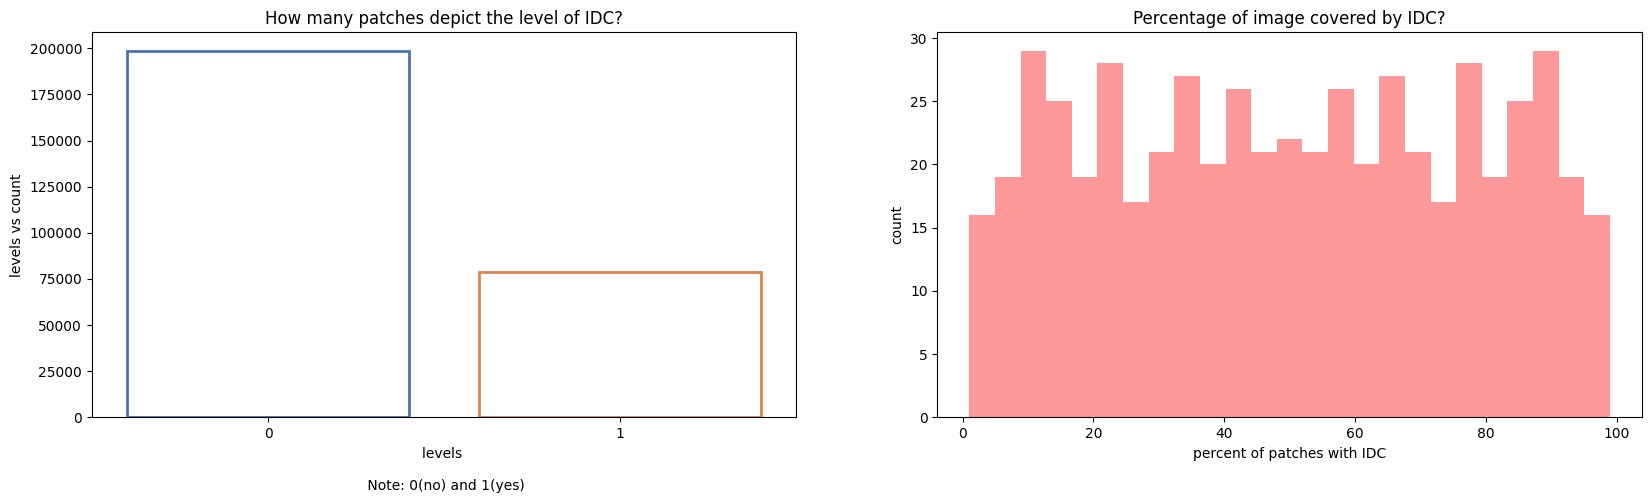

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.countplot(x='target', data=breastcancer_ds,
              facecolor = (0,0,0,0),
              linewidth = 2,
              edgecolor = sns.color_palette("deep", 5), ax=ax1)
ax1.set_title("How many patches depict the level of IDC?")
ax1.set_xlabel("levels \n\n Note: 0(no) and 1(yes)")
ax1.set_ylabel("levels vs count")


sns.distplot(cancer_class_perc.iloc[:,-1:], color="red", kde=False, bins=25, ax=ax2)
ax2.set_title("Percentage of image covered by IDC?")
ax2.set_xlabel("percent of patches with IDC")
ax2.set_ylabel("count")

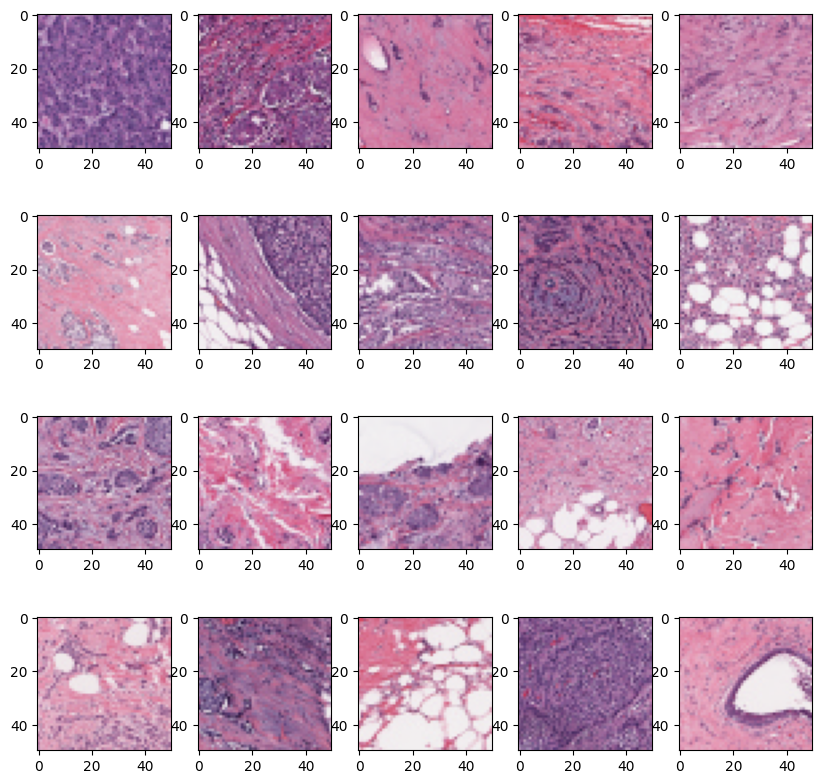

In [ ]:
cancer_cells = np.random.choice(breastcancer_ds[breastcancer_ds.target == 1].index.values, size=20, replace=False)

fig, ax = plt.subplots(4, 5, figsize=(10, 10))

for a in range(4):
    for b in range(5):
        index = cancer_cells[b + 5*a]
        imgs = imread(breastcancer_ds.loc[index, 'path'])
        ax[a,b].imshow(imgs)
        ax[a,b].grid(False)

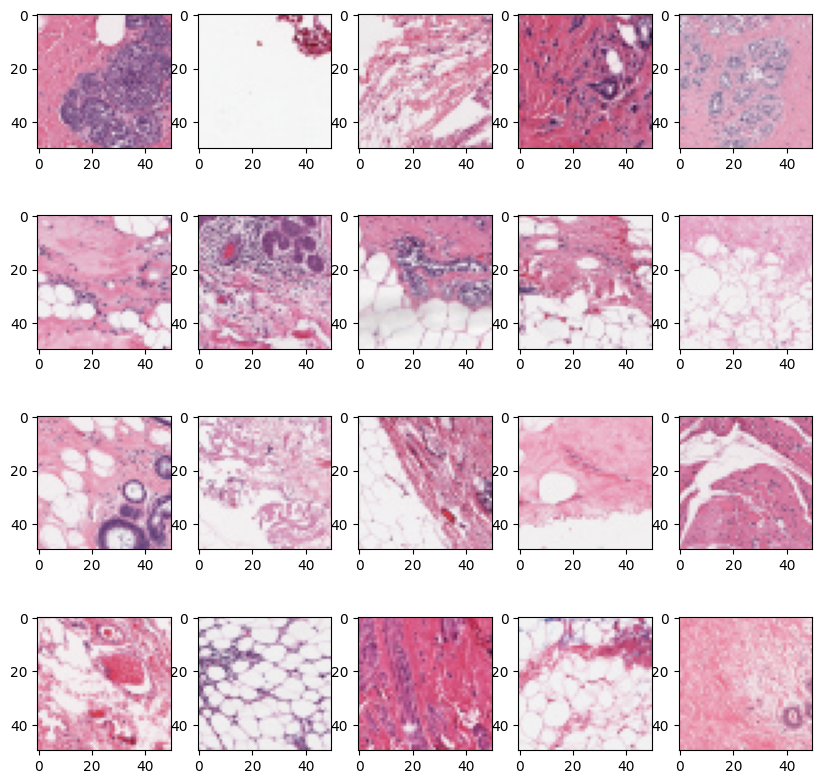

In [ ]:
non_cancer_cells = np.random.choice(breastcancer_ds[breastcancer_ds.target == 0].index.values, size=20, replace=False)

fig, ax = plt.subplots(4, 5, figsize=(10, 10))

for a in range(4):
    for b in range(5):
        index = non_cancer_cells[b + 5*a]
        imgs = imread(breastcancer_ds.loc[index, 'path'])
        ax[a,b].imshow(imgs)
        ax[a,b].grid(False)

## Preparing the dataset


In [ ]:
images_cancer = 'root_cancerIDC_dir'
verify_folder = os.path.isdir(images_cancer)

if not verify_folder:
    os.makedirs(images_cancer)
else:
    pass

In [ ]:
import glob
patients = breastHist_imgs2

for patient in patients:
    path_0 = 0
    path_1 = 1
    path = "/content/unzipped/IDC_regular_ps50_idx5/" # Added trailing slash and corrected path

    # Using os.path.join to construct paths correctly
    source = os.path.join(path, str(patient), str(path_0))
    dest = os.path.abspath(images_cancer)
    for file in glob.iglob(os.path.join(source, '**', '*.png'), recursive=True):
        shutil.copy(file, dest)

    source2 = os.path.join(path, str(patient), str(path_1))
    dest2 = os.path.abspath(images_cancer)
    for file in glob.iglob(os.path.join(source2, '**', '*.png'), recursive=True):
        shutil.copy(file, dest2)

In [ ]:
print("Total number of images:", len(listdir(images_cancer)))

Total number of images: 277524


In [ ]:
all_images = os.listdir(images_cancer)
df_all_images = pd.DataFrame(all_images, columns=['img_id'])

df_all_images.head()

,img_id
0,10275_idx5_x1851_y701_class1.png
1,9324_idx5_x1951_y1201_class0.png
2,12819_idx5_x1901_y2401_class1.png
3,9262_idx5_x251_y551_class0.png
4,9381_idx5_x2501_y401_class0.png


In [ ]:
df_all_images.tail()

,img_id
277519,10282_idx5_x1351_y2251_class0.png
277520,10292_idx5_x551_y1051_class0.png
277521,14079_idx5_x1101_y1151_class1.png
277522,16896_idx5_x801_y1351_class1.png
277523,12935_idx5_x801_y1501_class0.png


In [ ]:
import re

def retrieve_lastDigit(x):
    y = x[x.rindex('_')+1:]
    result = re.sub("\D", "", y)

    return result

# creating new column named patient_id
df_all_images['patient_num'] = df_all_images['img_id'].map(lambda x: x.split('_')[0])
df_all_images['target'] =  df_all_images['img_id'].apply(retrieve_lastDigit)

In [ ]:
df_all_images.head()

,img_id,patient_num,target
0,10275_idx5_x1851_y701_class1.png,10275,1
1,9324_idx5_x1951_y1201_class0.png,9324,0
2,12819_idx5_x1901_y2401_class1.png,12819,1
3,9262_idx5_x251_y551_class0.png,9262,0
4,9381_idx5_x2501_y401_class0.png,9381,0


In [ ]:
df_all_images['target'] =df_all_images['target'].astype(str).astype(int)

In [ ]:
df_all_images['target'].value_counts()

,count
target,
0,198738
1,78786


In [ ]:
n = 78786

df_all_images_0 = df_all_images[df_all_images['target'] == 0].sample(n, random_state=234)
df_all_images_1 = df_all_images[df_all_images['target'] == 1].sample(n, random_state=234)

In [ ]:
#del df_sample_images
df_all_images = pd.concat([df_all_images_0, df_all_images_1], axis=0).reset_index(drop=True)

In [ ]:
#count
df_all_images['target'].value_counts()

,count
target,
0,78786
1,78786


In [ ]:
# Making folders

base_split_dir = 'base_split_dir'
base_test_dir = 'base_test_dir'
base_train_dir = 'base_train_dir'
no_idc = 'no_idc'
yes_idc = 'yes_idc'


verify_folder2 = os.path.isdir(base_split_dir)

if not verify_folder2:
    os.makedirs(base_split_dir)
else:
    pass

os.makedirs(os.path.join(base_split_dir, base_train_dir))
os.makedirs(os.path.join(base_split_dir, base_test_dir))

os.makedirs(os.path.join(base_split_dir + '/' + base_train_dir, yes_idc))
os.makedirs(os.path.join(base_split_dir + '/' + base_train_dir, no_idc))

os.makedirs(os.path.join(base_split_dir + '/' + base_test_dir, yes_idc))
os.makedirs(os.path.join(base_split_dir + '/' + base_test_dir, no_idc))

In [ ]:
Y = df_all_images['target']
df_train, df_test = train_test_split(df_all_images, test_size=0.25, random_state=123, stratify=Y)
print(df_train.shape)
print(df_test.shape)

(118179, 3)
(39393, 3)


In [ ]:
train_lst = list(df_train['img_id'])
test_lst = list(df_test['img_id'])

In [ ]:
# Transfering the train images
for img in train_lst:
    try:
        target = df_all_images.loc[df_all_images['img_id']==img,'target'].values[0]
        label = 'no_idc' if (target == 0) else 'yes_idc'
        x = os.path.abspath(images_cancer)
        src = os.path.join(x, img)
        y = os.path.abspath(base_split_dir)
        dest = os.path.join(y, base_train_dir, label, img)
        shutil.move(src, dest)
    except:
        continue

for img in test_lst:
    try:
        target = df_all_images.loc[df_all_images['img_id']==img,'target'].values[0]
        label = 'yes_idc' if (target == 1) else 'no_idc'
        a = os.path.abspath(images_cancer)
        src1 = os.path.join(a, img)
        b = os.path.abspath(base_split_dir)
        dest1 = os.path.join(b, base_test_dir, label, img)
        shutil.move(src1, dest1)
    except:
        continue


In [ ]:
print(len(os.listdir('base_split_dir/base_train_dir/no_idc')))
print(len(os.listdir('base_split_dir/base_test_dir/yes_idc')))

59089
19696


In [ ]:
num_train_samples = len(df_train)
num_test_samples = len(df_test)

batch_size = 32
IMAGE_SIZE = 50

train_steps = int(np.ceil(num_train_samples / batch_size))
test_steps = int(np.ceil(num_test_samples / batch_size))

In [ ]:
datagen = ImageDataGenerator(rescale = 1.0 / 255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')

train_gen = datagen.flow_from_directory('base_split_dir/base_train_dir',
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),  # all images will be resized to 50x50
                                        batch_size=batch_size,
                                        class_mode='categorical')


val_gen = datagen.flow_from_directory('base_split_dir/base_test_dir',
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=batch_size,
                                        class_mode='categorical')

validation_generator = datagen.flow_from_directory('base_split_dir/base_test_dir',
                                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 118179 images belonging to 2 classes.
Found 39393 images belonging to 2 classes.
Found 39393 images belonging to 2 classes.


In [ ]:
import torch
import torch.nn as nn
import timm
import numpy as np
import random
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

# ------------------------------
# Setup
# ------------------------------
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(reduction='none')
    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        return self.alpha * ((1 - pt) ** self.gamma * ce_loss).mean()

# ------------------------------
# Soft Voting Ensemble Evaluation
# ------------------------------
def evaluate_ensemble_soft(models, dataloader, device):
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            logits_sum = sum([model(images) for model in models]) / len(models)
            preds = torch.argmax(logits_sum, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    return acc

# ------------------------------
# Training Function
# ------------------------------
def train_model(model_name, train_loader, val_loader, save_path, device, epochs=20):
    model = timm.create_model(model_name, pretrained=True, num_classes=2).to(device)
    criterion = FocalLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3, factor=0.5)
    best_val_acc = 0

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        train_acc = correct / total

        model.eval()
        val_correct = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
        val_acc = val_correct / len(val_loader.dataset)
        scheduler.step(val_acc)

        print(f"{model_name} | Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), save_path)
            print(f"Saved best model for {model_name} with Val Acc: {val_acc:.4f}")
    return model


In [ ]:
# Setup
set_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(30),
    transforms.ColorJitter(0.2, 0.2),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.2),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load Datasets
train_dataset = datasets.ImageFolder("base_split_dir/base_train_dir", transform=train_transform)
val_dataset = datasets.ImageFolder("base_split_dir/base_test_dir", transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [ ]:
models = []
model_names = ["efficientnet_b3", "convnext_tiny", "swin_tiny_patch4_window7_224"]
model_paths = ["efficientnet_b3_soft.pth", "convnext_tiny_soft.pth", "swin_tiny_soft.pth"]

# Train each model and save
for name, path in zip(model_names, model_paths):
    model = train_model(name, train_loader, val_loader, path, device)
    models.append(model)

# Final ensemble evaluation
ensemble_acc = evaluate_ensemble_soft(models, val_loader, device)
print(f"\n Ensemble Accuracy (Soft Voting): {ensemble_acc:.4f}")


efficientnet_b3 | Epoch 1 - Train Acc: 0.8268, Val Acc: 0.8628
Saved best model for efficientnet_b3 with Val Acc: 0.8628
efficientnet_b3 | Epoch 2 - Train Acc: 0.8709, Val Acc: 0.8906
Saved best model for efficientnet_b3 with Val Acc: 0.8906
efficientnet_b3 | Epoch 3 - Train Acc: 0.8859, Val Acc: 0.9003
Saved best model for efficientnet_b3 with Val Acc: 0.9003
efficientnet_b3 | Epoch 4 - Train Acc: 0.8955, Val Acc: 0.8964
efficientnet_b3 | Epoch 5 - Train Acc: 0.9034, Val Acc: 0.9083
Saved best model for efficientnet_b3 with Val Acc: 0.9083
efficientnet_b3 | Epoch 6 - Train Acc: 0.9074, Val Acc: 0.9044
efficientnet_b3 | Epoch 7 - Train Acc: 0.9134, Val Acc: 0.9121
Saved best model for efficientnet_b3 with Val Acc: 0.9121
efficientnet_b3 | Epoch 8 - Train Acc: 0.9176, Val Acc: 0.9120
efficientnet_b3 | Epoch 9 - Train Acc: 0.9238, Val Acc: 0.9129
Saved best model for efficientnet_b3 with Val Acc: 0.9129
efficientnet_b3 | Epoch 10 - Train Acc: 0.9286, Val Acc: 0.9128
efficientnet_b3 | Epo

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

convnext_tiny | Epoch 1 - Train Acc: 0.8293, Val Acc: 0.8726
Saved best model for convnext_tiny with Val Acc: 0.8726
convnext_tiny | Epoch 2 - Train Acc: 0.8788, Val Acc: 0.8925
Saved best model for convnext_tiny with Val Acc: 0.8925
convnext_tiny | Epoch 3 - Train Acc: 0.8865, Val Acc: 0.8808
convnext_tiny | Epoch 4 - Train Acc: 0.8934, Val Acc: 0.8844
convnext_tiny | Epoch 5 - Train Acc: 0.8968, Val Acc: 0.8936
Saved best model for convnext_tiny with Val Acc: 0.8936
convnext_tiny | Epoch 6 - Train Acc: 0.9005, Val Acc: 0.9047
Saved best model for convnext_tiny with Val Acc: 0.9047
convnext_tiny | Epoch 7 - Train Acc: 0.9041, Val Acc: 0.8997
convnext_tiny | Epoch 8 - Train Acc: 0.9069, Val Acc: 0.9048
Saved best model for convnext_tiny with Val Acc: 0.9048
convnext_tiny | Epoch 9 - Train Acc: 0.9098, Val Acc: 0.9064
Saved best model for convnext_tiny with Val Acc: 0.9064
convnext_tiny | Epoch 10 - Train Acc: 0.9105, Val Acc: 0.9107
Saved best model for convnext_tiny with Val Acc: 0.91

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

swin_tiny_patch4_window7_224 | Epoch 1 - Train Acc: 0.8648, Val Acc: 0.8885
Saved best model for swin_tiny_patch4_window7_224 with Val Acc: 0.8885
swin_tiny_patch4_window7_224 | Epoch 2 - Train Acc: 0.8853, Val Acc: 0.8978
Saved best model for swin_tiny_patch4_window7_224 with Val Acc: 0.8978
swin_tiny_patch4_window7_224 | Epoch 3 - Train Acc: 0.8917, Val Acc: 0.8990
Saved best model for swin_tiny_patch4_window7_224 with Val Acc: 0.8990
swin_tiny_patch4_window7_224 | Epoch 4 - Train Acc: 0.8949, Val Acc: 0.9061
Saved best model for swin_tiny_patch4_window7_224 with Val Acc: 0.9061
swin_tiny_patch4_window7_224 | Epoch 5 - Train Acc: 0.8986, Val Acc: 0.8969
swin_tiny_patch4_window7_224 | Epoch 6 - Train Acc: 0.9028, Val Acc: 0.9109
Saved best model for swin_tiny_patch4_window7_224 with Val Acc: 0.9109
swin_tiny_patch4_window7_224 | Epoch 7 - Train Acc: 0.9046, Val Acc: 0.9113
Saved best model for swin_tiny_patch4_window7_224 with Val Acc: 0.9113
swin_tiny_patch4_window7_224 | Epoch 8 - T

In [ ]:
from torchvision.transforms.functional import hflip, vflip, rotate
def tta_predict(model, image, device):
    image = image.unsqueeze(0).to(device)
    variants = [
        image,
        hflip(image),
        vflip(image),
        rotate(image, 90),
        rotate(image, 180),
        rotate(image, 270)
    ]
    with torch.no_grad():
        outputs = [model(v) for v in variants]
        return torch.stack(outputs).mean(0)

def evaluate_ensemble_tta(models, dataloader, device):
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            for i in range(images.size(0)):
                img = images[i]
                label = labels[i].item()
                logits = sum([tta_predict(model, img, device) for model in models]) / len(models)
                pred = torch.argmax(logits, dim=1).item()
                all_preds.append(pred)
                all_labels.append(label)
    acc = accuracy_score(all_labels, all_preds)
    return acc


In [ ]:
# Data loader (same transform as training except no augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
val_dataset = datasets.ImageFolder("base_split_dir/base_test_dir", transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=32)

# Load saved models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_names = ["efficientnet_b3", "convnext_tiny", "swin_tiny_patch4_window7_224"]
model_paths = ["efficientnet_b3_soft.pth", "convnext_tiny_soft.pth", "swin_tiny_soft.pth"]

models = []
for name, path in zip(model_names, model_paths):
    model = timm.create_model(name, pretrained=False, num_classes=2)
    model.load_state_dict(torch.load(path, map_location=device))
    model.to(device)
    model.eval()
    models.append(model)

# Run TTA Ensemble Evaluation
tta_acc = evaluate_ensemble_tta(models, val_loader, device)
print(f"\n✅ TTA Ensemble Accuracy: {tta_acc:.4f}")



✅ TTA Ensemble Accuracy: 0.9275


In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.3 MB/

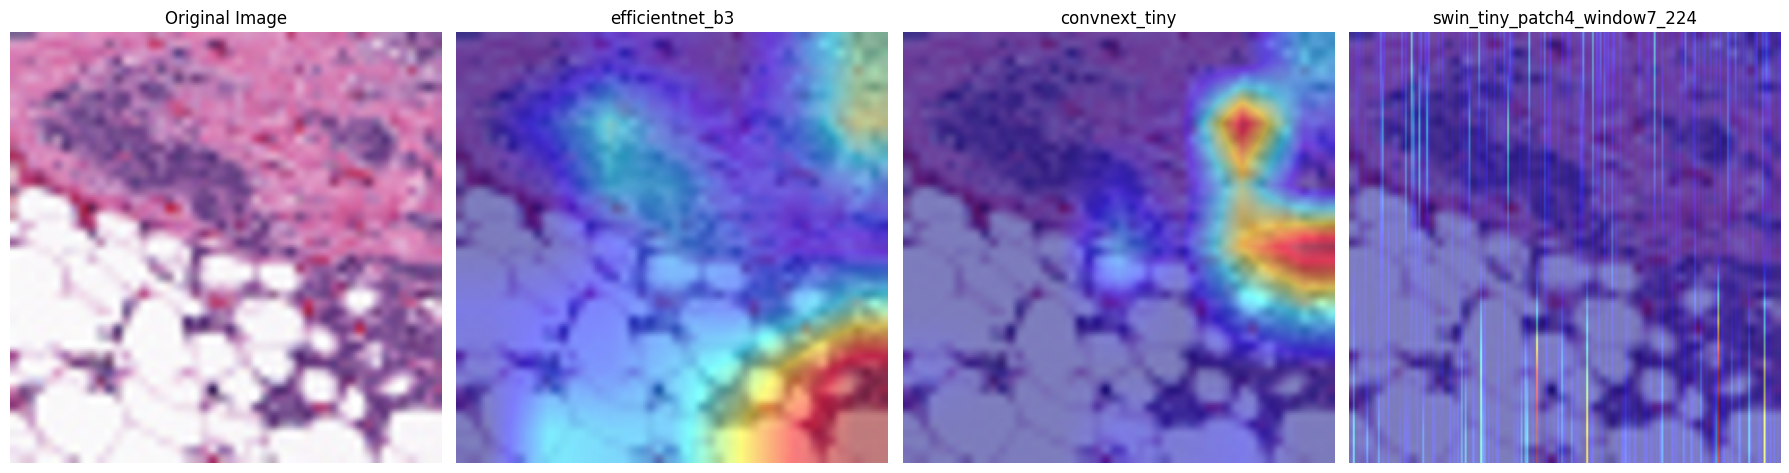

In [ ]:
import torch
import timm
import numpy as np
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# ------------------------------------------------------------
# LOAD MODEL FUNCTION
# ------------------------------------------------------------
def load_model(model_name, weight_path):
    model = timm.create_model(model_name, pretrained=False, num_classes=2)
    model.load_state_dict(torch.load(weight_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
    model.eval()
    return model

# ------------------------------------------------------------
# GRAD-CAM GENERATOR
# ------------------------------------------------------------
def generate_cam(model, target_layer, input_tensor, raw_np_image):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)
    cam = GradCAM(model=model.to(device), target_layers=[target_layer])
    targets = [ClassifierOutputTarget(1)]  # class 1 = IDC
    grayscale_cam = cam(input_tensor=input_tensor.to(device), targets=targets)[0]
    cam_image = show_cam_on_image(raw_np_image, grayscale_cam, use_rgb=True)
    return cam_image

# ------------------------------------------------------------
# IMAGE LOADING
# ------------------------------------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


image_path = "base_split_dir/base_test_dir/yes_idc/10253_idx5_x551_y701_class1.png" #/content/base_split_dir/base_test_dir/yes_idc/10253_idx5_x551_y701_class1.png  # class 1 = IDC
raw_image = Image.open(image_path).convert('RGB')
input_tensor = transform(raw_image).unsqueeze(0)
input_np = np.array(raw_image.resize((224, 224))) / 255.0

# ------------------------------------------------------------
# MODEL CONFIGURATIONS
# ------------------------------------------------------------
model_configs = [
    ("efficientnet_b3", "efficientnet_b3_soft.pth"),
    ("convnext_tiny", "convnext_tiny_soft.pth"),
    ("swin_tiny_patch4_window7_224", "swin_tiny_soft.pth")
]

cams = []

# ------------------------------------------------------------
# GENERATE GRAD-CAMs
# ------------------------------------------------------------
for name, path in model_configs:
    model = load_model(name, path)
    if "efficientnet" in name:
        target_layer = model.conv_head
    elif "convnext" in name:
        target_layer = model.stages[-1].downsample
    elif "swin" in name:
        target_layer = model.norm
    cam_image = generate_cam(model, target_layer, input_tensor, input_np)
    cams.append((name, cam_image))

# ------------------------------------------------------------
# DISPLAY RESULTS
# ------------------------------------------------------------
plt.figure(figsize=(18, 6))
plt.subplot(1, len(cams)+1, 1)
plt.imshow(input_np)
plt.title("Original Image")
plt.axis("off")

for i, (name, cam_img) in enumerate(cams):
    plt.subplot(1, len(cams)+1, i+2)
    plt.imshow(cam_img)
    plt.title(f"{name}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import torch
import timm
import numpy as np


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_names = ["efficientnet_b3", "convnext_tiny", "swin_tiny_patch4_window7_224"]
model_paths = ["efficientnet_b3_soft.pth", "convnext_tiny_soft.pth", "swin_tiny_soft.pth"]

models = []
for name, path in zip(model_names, model_paths):
    model = timm.create_model(name, pretrained=False, num_classes=2)
    model.load_state_dict(torch.load(path, map_location=device))
    model.to(device).eval()
    models.append(model)


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

val_dataset = datasets.ImageFolder("base_split_dir/base_test_dir", transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=32)

all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        logits = sum([model(images) for model in models]) / len(models)
        probs = torch.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)

        all_labels.extend(labels.numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs[:, 1].cpu().numpy())  # Class 1 probabilities for AUC


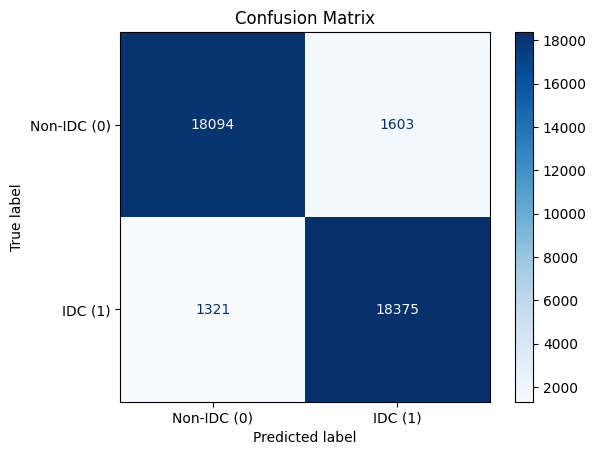

📋 Classification Report:

              precision    recall  f1-score   support

     Non-IDC       0.93      0.92      0.93     19697
         IDC       0.92      0.93      0.93     19696

    accuracy                           0.93     39393
   macro avg       0.93      0.93      0.93     39393
weighted avg       0.93      0.93      0.93     39393



In [ ]:
# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-IDC (0)", "IDC (1)"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("📋 Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=["Non-IDC", "IDC"]))


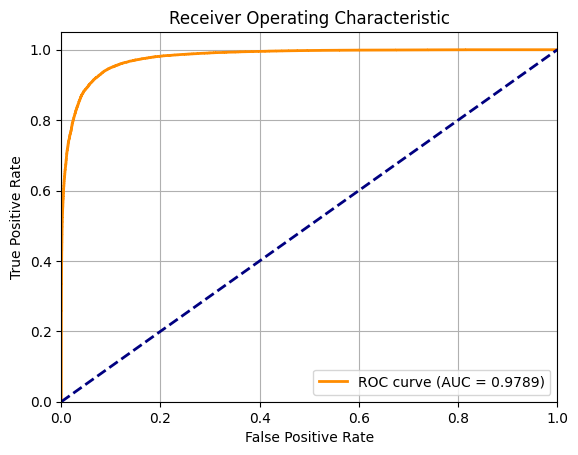

In [ ]:
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.show()


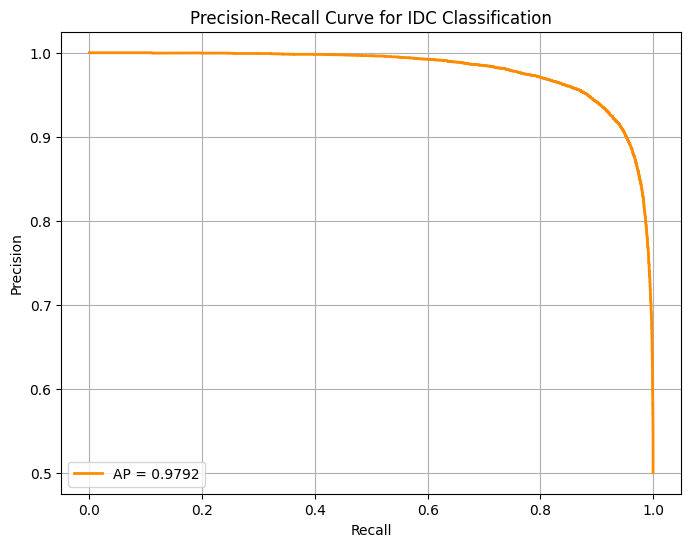

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(all_labels, all_probs)
avg_precision = average_precision_score(all_labels, all_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="darkorange", lw=2, label=f'AP = {avg_precision:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for IDC Classification")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()